### Gastos dos vereadores com correios

**Autor:** Rodolfo Viana<br>
**Data de início:** 10 de fevereiro de 2018<br>
**Data de término:** 10 de fevereiro de 2018<br>
**Fonte de dados:** [SisGV Consulta](https://app-sisgvconsulta-prd.azurewebsites.net/)<br>
**Coleta de dados:** Extração em 10 de fevereiro de 2018, com script próprio<br>
**Arquivo de origem (convertido):** `gastos_vereadores.csv`<br>
**Ferramentas e bibliotecas:** Python 3.6, Jupyter, Pandas, Numpy, Matplotlib, Seaborn

In [1]:
# Importação das ferramentas de análise
import pandas as pd
import numpy as np

# Leitura do arquivo
dataset = pd.read_csv('data/gastos_vereadores.csv', sep = ';',
                      dtype = {'despesa': 'category'})

# Descarte de colunas inúteis para a análise
dataset = dataset.drop(columns=['chave', 'nome_arquivo', 'centro_custo'])

# Segmentação dos dados por ano
dataset = dataset[dataset['ano'] == 2017]

# Resultado
print(f'Estão em análise:\n* {len(dataset)} despesas de 2017\n\
* {dataset["vereador"].nunique()} ocupantes do cargo de vereador e lideranças\n\
* {dataset["cnpj"].nunique()} fornecedores\n\
* R$ {dataset["valor"].sum()} em despesas')

Estão em análise:
* 5670 despesas de 2017
* 77 ocupantes do cargo de vereador e lideranças
* 493 fornecedores
* R$ 11161937.510000002 em despesas


In [2]:
# Checagem de registro
dataset.iloc[0]

departamento               GABINETE DE VEREADOR
tipo_departamento                             1
vereador                              ABOU ANNI
ano                                        2017
mes                                           1
despesa                             COMBUSTIVEL
cnpj                         43.900.851/0001-01
fornecedor           PROTOTIPO AUTO POSTO LTDA.
valor                                       880
Name: 0, dtype: object

In [3]:
# Renomeação da categoria 'despesa'
dataset['despesa'].cat.rename_categories([
    'Aperfeiçoamento profissional', 
    'Jornais e revistas', 
    'Combustível', 
    'Serviços gráficos', 
    'Contratação de PJ', 
    'Correios', 
    'Site',
    'Estacionamento',
    'Eventos', 
    'Correios (intermediado)', 
    'Aluguel de veículos (intermediado)',
    'Xerox (intermediado)', 
    'Limpeza de veículos', 
    'Livros', 
    'Aluguel de móveis/equipamentos', 
    'Aluguel de veículos', 
    'Lubrificante', 
    'Material de escritório', 
    'Internet', 
    'Xerox', 
    'Telefone fixo', 
    'Celular'
], inplace = True)

# Agrupamento por tipo de despesa
df_tipo = dataset.groupby(['despesa']).agg({'valor': sum})\
                                      .sort_values('valor', ascending = False)\
                                      .reset_index()

# Cálculo de porcentagem
df_tipo['porcentagem'] = (df_tipo['valor'] / df_tipo['valor'].sum()) * 100

# Formatação dos números 'float' para dois dígitos decimais
df_tipo['valor'] = df_tipo['valor'].map('{0:.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_tipo

,despesa,valor,porcentagem
0,Serviços gráficos,2460394.61,22.04
1,Contratação de PJ,2238818.05,20.06
2,Correios (intermediado),1612470.74,14.45
3,Site,1142395.83,10.23
4,Aluguel de veículos (intermediado),976990.46,8.75
5,Material de escritório,891605.42,7.99
6,Aluguel de móveis/equipamentos,702451.93,6.29
7,Combustível,451709.34,4.05
8,Xerox,150152.51,1.35
9,Celular,134694.56,1.21


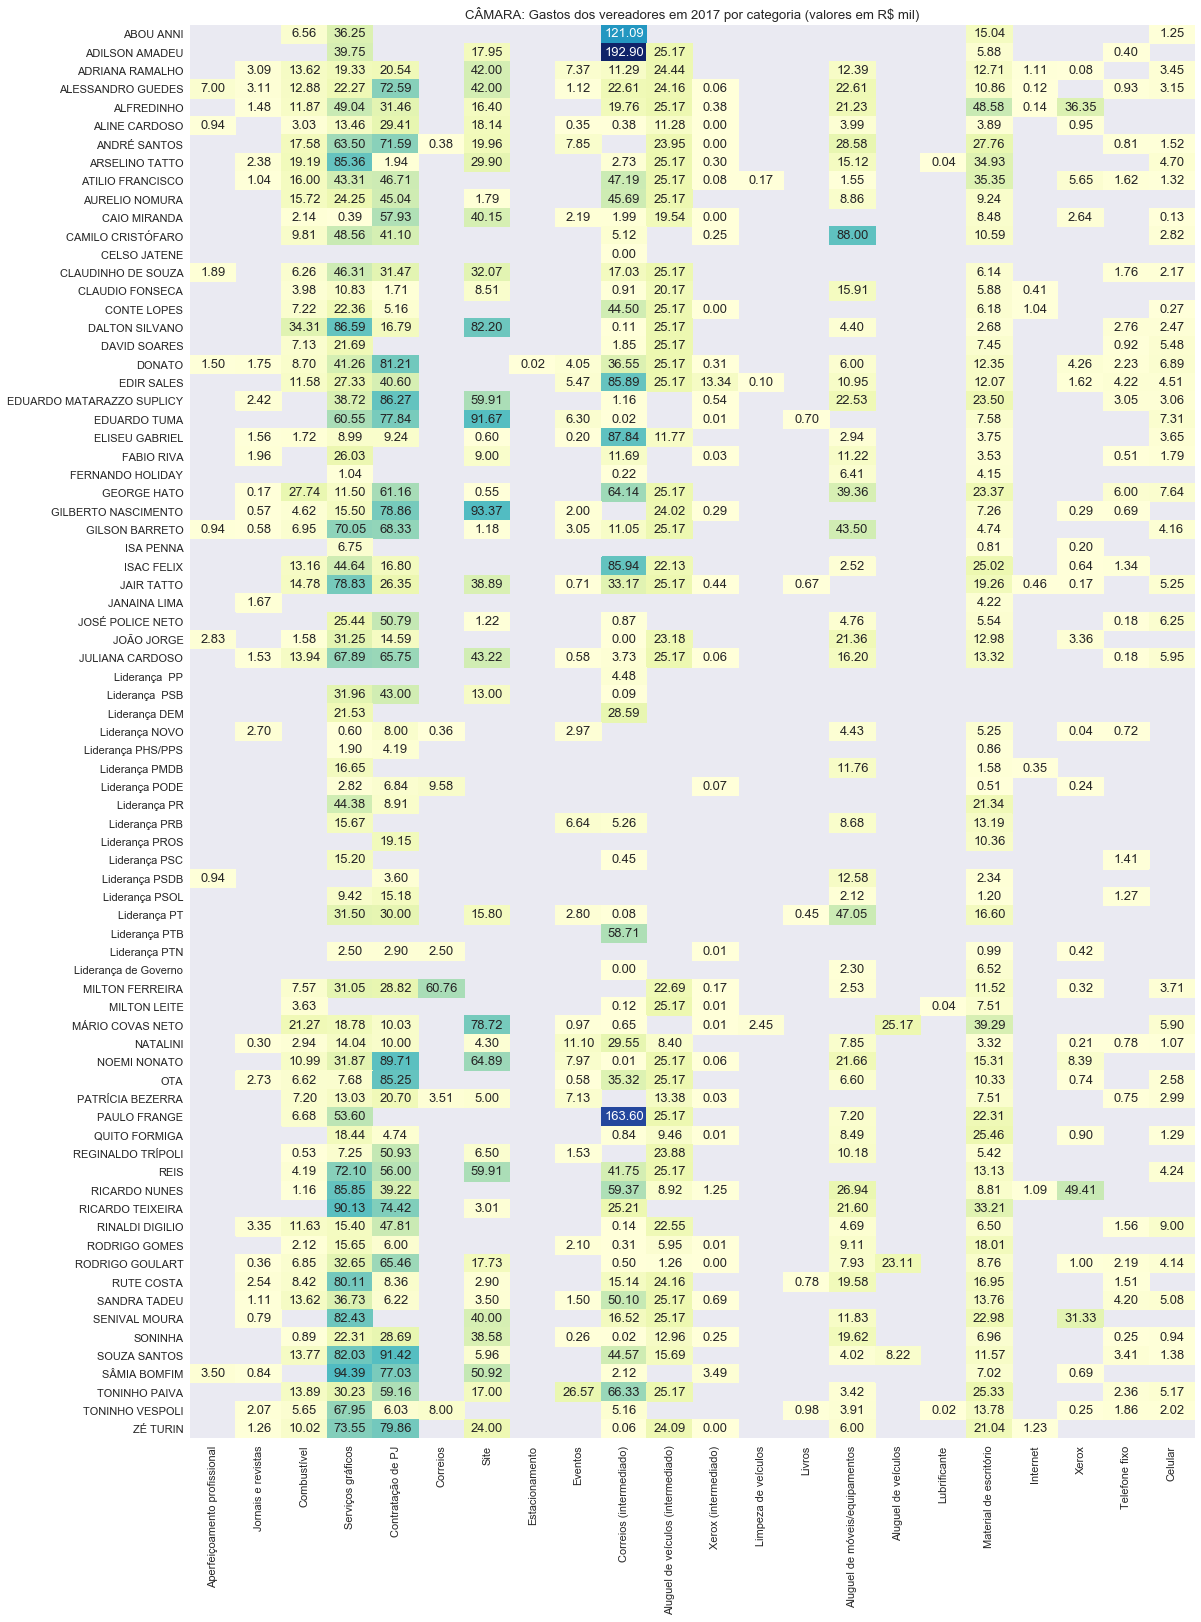

In [4]:
# Importação de bibliotecas de gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Agrupamento de dados por despesa e vereador
grafico = dataset.groupby(['despesa', 'vereador']).agg({'valor': sum})\
                                                  .sort_values('valor', ascending = False)\
                                                  .reset_index()

# Divisão dos valores por 1000 (para facilitar a visualização no gráfico)
grafico['valor'] = grafico['valor'] / 1000

# Alteração dos eixos dos dados
grafico_pivot = grafico.pivot(index='vereador',\
                              columns='despesa',\
                              values='valor')

# Criação do gráfico
sns.set(font_scale=1.1)
plt.figure(figsize=(18, 26))
ax = sns.heatmap(grafico_pivot,\
                 cmap='YlGnBu',\
                 annot=True,\
                 fmt='.2f',\
                 cbar=False,\
                 vmax=200,\
                 annot_kws={"size":13})
ax.set_title('CÂMARA: Gastos dos vereadores em 2017 por categoria (valores em R$ mil)')
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()

Três vereadores se destacam na categoria "Correios (intermediado)", com mais de R$ 100 mil no ano:

```
+ Abou Anni (PV) - R$ 121 mil
+ Adilson Amadeu (PTB) - R$ 192,9 mil
+ Paulo Frange (PTB) - R$ 163,6 mil
```

In [5]:
# Segmentação dos dados por vereador e despesa
anni = dataset[(dataset['vereador'] == 'ABOU ANNI') & \
               (dataset['despesa'] == 'Correios (intermediado)')]

# Agrupamento por mês
anni_grupo = anni.groupby(['mes']).agg({'valor': sum}).reset_index()

# Descrição dos gastos
anni_grupo['valor'].describe()

count        8.000000
mean     15136.690000
std      12498.855488
min       5993.270000
25%       6375.957500
50%       7864.570000
75%      22186.130000
max      34530.360000
Name: valor, dtype: float64

Em 2017, Abou Anni foi vereador por oito meses. No período, teve gasto mensal médio de R$ 15.136,69.

O `std`, contudo, leva a inferir um padrão de gasto irregular. Isso é comprovado quando vemos:

```
+ valor mínimo: R$ 5.993,27
+ valor máximo: R$ 34.530,36
```

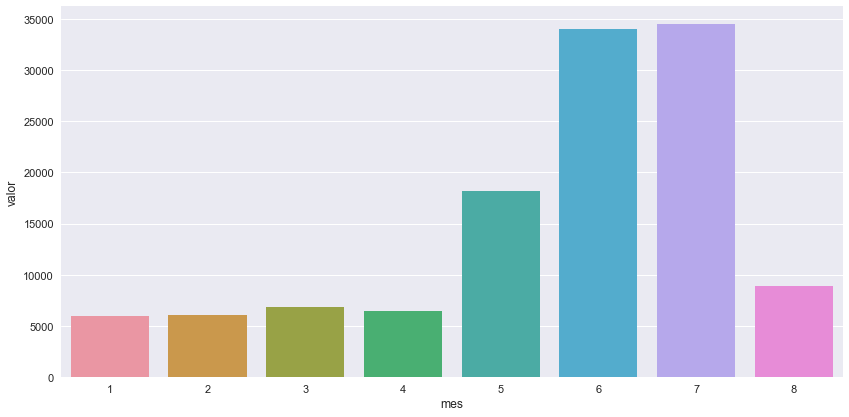

In [6]:
# Criação de gráfico por mês
sns.set(font_scale=1.1)
sns.factorplot(x='mes', 
               y='valor', 
               data=anni_grupo, 
               kind='bar', 
               margin_titles=False, 
               size=6, 
               aspect=2)
sns.despine()

In [7]:
# Segmentação dos dados por vereador e despesa
amadeu = dataset[(dataset['vereador'] == 'ADILSON AMADEU') & \
                 (dataset['despesa'] == 'Correios (intermediado)')]

# Agrupamento por mês
amadeu_grupo = amadeu.groupby(['mes']).agg({'valor': sum}).reset_index()

# Descrição dos gastos
amadeu_grupo['valor'].describe()

count       12.00000
mean     16074.74250
std      14527.94367
min        666.37000
25%       3741.89750
50%       8956.18000
75%      29694.07750
max      38524.79000
Name: valor, dtype: float64

Adilson Amadeu foi vereador em todos os meses de 2017. Seu gasto mensal médio com correios foi de R$ 14.527,94.

O `std` também se aproxima de mean, o que indica padrão irregular de despesas no decorrer dos meses:

```
+ valor mínimo: R$ 666,37
+ valor máximo: R$ 38.524,79
```

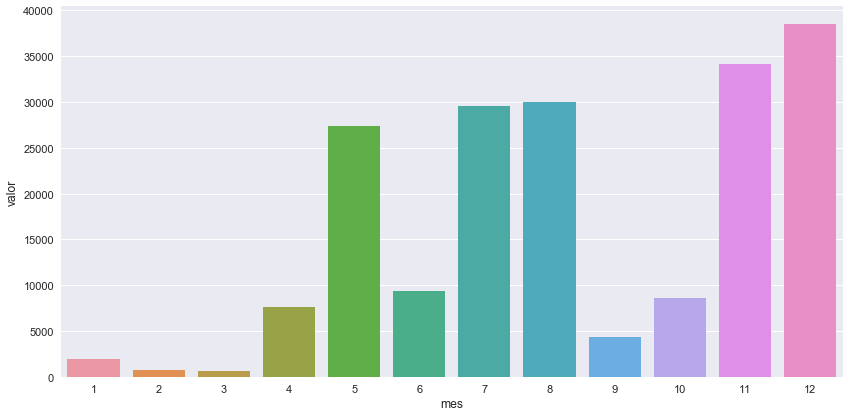

In [8]:
# Criação de gráfico por mês
sns.factorplot(x='mes', 
               y='valor', 
               data=amadeu_grupo, 
               kind='bar', 
               margin_titles=False, 
               size=6, 
               aspect=2)
sns.despine()

In [9]:
# Segmentação dos dados por vereador e despesa
frange = dataset[(dataset['vereador'] == 'PAULO FRANGE') & \
                 (dataset['despesa'] == 'Correios (intermediado)')]

# Agrupamento por mês
frange_grupo = frange.groupby(['mes']).agg({'valor': sum}).reset_index()

# Descrição dos gastos
frange_grupo['valor'].describe()

count       12.000000
mean     13633.467500
std      24387.999834
min       5420.780000
25%       5959.560000
50%       6552.035000
75%       7242.710000
max      90993.120000
Name: valor, dtype: float64

Paulo Frange também ocupou o cargo de vereador durante todos os meses. Sua despesa média mensal com correios foi de R$ 13.633,47.

O std mais elevado que o mean reflete um pico nos gastos em determinado período -- uma anomalia em comparação ao restante dos meses:

```
+ valor mínimo: R$ 5.420,78
+ valor máximo: R$ 90.993,12
```

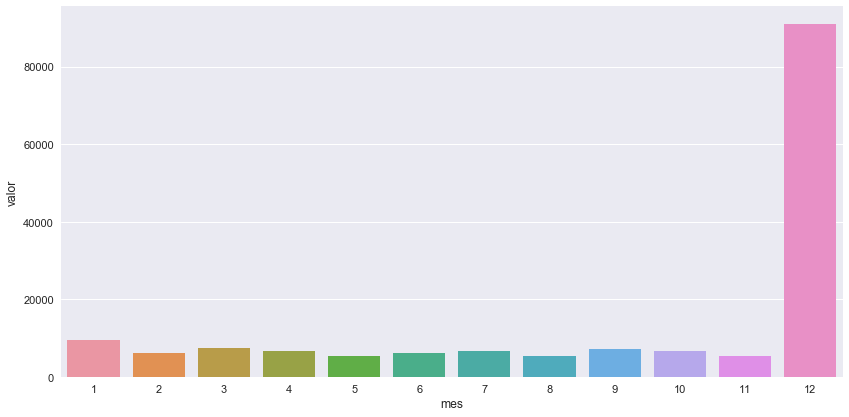

In [10]:
# Criação de gráfico por mês
sns.factorplot(x='mes', 
               y='valor', 
               data=frange_grupo, 
               kind='bar', 
               margin_titles=False, 
               size=6, 
               aspect=2)
sns.despine()

---
#### Atualização

_3 de março de 2018_

A análise mostou que três vereadores gastaram, cada, mais de R$ 100 mil com correios em 2017. A partir das informações aqui apresentadas, pedi à Câmara, via LAI, os extratos dos vereadores para entender por que havia despesas tão altas. Os registros apontavam o motivo para os valores elevados: malas diretas.

Malas diretas, segundo os Correios,

> é uma mensagem publicitária com apelo promocional ou meramente informativa (propaganda), com objetivo de venda, divulgação, informação, prospecção e/ou fidelização, encaminhada a um público dirigido ou com potencial para resposta, emitida em vários exemplares idênticos ou personalizados.

Em resumo, é, no contexto político, autopromoção. Isso é vedado pela Constituição:

> Art. 37. A administração pública direta e indireta de qualquer dos Poderes da União, dos Estados, do Distrito Federal e dos Municípios obedecerá aos princípios de legalidade, impessoalidade, moralidade, publicidade e eficiência e, também, ao seguinte:<br><br>
> (...)<br><br>
> XXII - as administrações tributárias da União, dos Estados, do Distrito Federal e dos Municípios, atividades essenciais ao funcionamento do Estado, exercidas por servidores de carreiras específicas, terão recursos prioritários para a realização de suas atividades e atuarão de forma integrada, inclusive com o compartilhamento de cadastros e de informações fiscais, na forma da lei ou convênio.<br><br>
> § 1º A publicidade dos atos, programas, obras, serviços e campanhas dos órgãos públicos deverá ter caráter educativo, informativo ou de orientação social, dela não podendo constar nomes, símbolos ou imagens que caracterizem promoção pessoal de autoridades ou servidores públicos.

Tínhamos, portanto, uma pauta. E ela ficou assim: [https://globoplay.globo.com/v/6543894/](https://globoplay.globo.com/v/6543894/)

Cabe ressaltar, porém, que há divergências entre os dados apresentados na análise, que foram extraídos do SisGV Consulta (mantido pela própria Câmara), e os extratos dos Correios. Embora ambos sejam dados oficiais, utilizei na reportagem as informações dos Correios, por suspeitar de falha na estruturação da API do SisGV -- falha esta que repassei à assessoria da Câmara para que possa corrigir.